# Starting with Data

## Working With Pandas DataFrames in Python


### Learning Objectives
* Explain what a library is, and what libraries are used for.
* Load a Python/Pandas library.
* Read tabular data from a file into Python using Pandas using `read_csv`.
* Learn about the Pandas DataFrame object.
* Learn about data slicing and indexing.
* Perform mathematical operations on numeric data.
* Create simple plots of data.

## Presentation of the survey data

For this lesson, we will be using the Portal Teaching data, a subset of the data from Ernst et al [Long-term monitoring and experimental manipulation of a Chihuahuan Desert ecosystem near Portal, Arizona, USA](http://www.esapubs.org/archive/ecol/E090/118/default.htm)

We are studying the species and weight of animals caught in plots in our study
area. The dataset is stored as a `.csv` file: each row holds information for a
single animal, and the columns represent:

| Column           | Description                        |
|------------------|------------------------------------|
| record_id       | Unique id for the observation      |
| month            | month of observation               |
| day              | day of observation                 |
| year             | year of observation                |
| plot_id           | ID of a particular plot            |
| species_id       | 2-letter code                      |
| sex              | sex of animal ("M", "F")           |
| hindfoot_length  | length of the hindfoot in mm
| weight           | weight of the animal in grams      |


### Download lesson data

We will be using files from the [Portal Project Teaching Database](https://figshare.com/articles/Portal_Project_Teaching_Database/1314459).

This section will use the `surveys.csv` file that can be downloaded here: [https://ndownloader.figshare.com/files/2292172](https://ndownloader.figshare.com/files/2292172)



In [ ]:
surveys_url = 'https://raw.githubusercontent.com/weecology/portal-teachingdb/master/surveys.csv'

---


## About Libraries
A library in Python contains a set of tools (called functions) that perform
tasks on our data. Importing a library is like getting a piece of lab equipment
out of a storage locker and setting it up on the bench for use in a project.
Once a library is set up, it can be used or called to perform many tasks.

## Pandas in Python
One of the best options for working with tabular data in Python is to use the
[Python Data Analysis Library](http://pandas.pydata.org/) (a.k.a. Pandas). The
Pandas library provides data structures, produces high quality plots with
[matplotlib](http://matplotlib.org/) and integrates nicely with other libraries
that use [NumPy](http://www.numpy.org/) (which is another Python library) arrays.

Python doesn't load all of the libraries available to it by default. We have to
add an `import` statement to our code in order to use library functions. To import
a library, we use the syntax `import libraryName`. If we want to give the
library a nickname to shorten the command, we can add `as nickNameHere`.  An
example of importing the pandas library using the common nickname `pd` is below.


```python
import pandas as pd
```

Each time we call a function that's in a library, we use the syntax
`LibraryName.FunctionName`. Adding the library name with a `.` before the
function name tells Python where to find the function. In the example above, we
have imported Pandas as `pd`. This means we don't have to type out `pandas` each
time we call a Pandas function.


## Lesson Overview

For this lesson we will be using the Portal Teaching data.

We are studying the species and weight of animals caught in plots in a study
area. The data sets are stored in `.csv` (comma separated values) format. Within
the `.csv` files, each row holds information for a single animal, and the
columns represent: record_id, month, day, year, plot, species, sex, wgt.

The first few rows of our first file look like this:

```
record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
1,7,16,1977,2,NL,M,32,
2,7,16,1977,3,NL,M,33,
3,7,16,1977,2,DM,F,37,
4,7,16,1977,7,DM,M,36,
5,7,16,1977,3,DM,M,35,
6,7,16,1977,1,PF,M,14,
7,7,16,1977,2,PE,F,,
8,7,16,1977,1,DM,M,37,
9,7,16,1977,1,DM,F,34,
```

### We want to:

1. Load that data into memory using Python.
2. Calculate the average weight of all individuals sampled, by species.
3. Plot the average weights by species and perhaps by plot_id too.

We can automate the process above using Python. It's efficient to spend time
building the code to perform these tasks because once it's built, we can use it
over and over on different datasets that use a similar format. This makes our
methods easily reproducible. We can also easily share our code with colleagues
and they can replicate the same analysis.


# Reading CSV Data Using Pandas

We will begin by locating and reading our survey data which are in CSV format.
We can use Pandas' `read_csv` function to pull the file directly into a
[DataFrame](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe).

## So What's a DataFrame?

A DataFrame is a 2-dimensional data structure that can store data of different
types (including characters, integers, floating point values, factors and more)
in columns. It is similar to a spreadsheet or an SQL table or the `data.frame` in
R. A DataFrame always has an index (0-based). An index refers to the position of 
an element in the data structure.

First, let's make sure the Python Pandas library is loaded. We will import
Pandas using the nickname `pd`.  This is a common convention on the internet,
so if you look up Pandas usage, you will often see it this way.

```python
import pandas as pd
```

Let's also import the [OS Library](https://docs.python.org/3/library/os.html).
This library allows us to make sure we are in the correct working directory. If
you are working in IPython Notebook, be sure to start the notebook in the
workshop repository.  If you didn't do that you can always set the working
directory using the code below.

```python
import os
os.getcwd()
# if this directory isn't right, use the command below to set the working directory
os.chdir("YOURPathHere")
```

```python
# note that pd.read_csv is used because we imported pandas as pd
pd.read_csv("surveys.csv")
```

The above command yields the **output** below:

```
record_id  month  day  year  plot_id species_id sex  hindfoot_length  weight
0          1      7   16  1977        2         NL   M               32   NaN
1          2      7   16  1977        3         NL   M               33   NaN
2          3      7   16  1977        2         DM   F               37   NaN
3          4      7   16  1977        7         DM   M               36   NaN
4          5      7   16  1977        3         DM   M               35   NaN
...
35544      35545     12   31  2002       15     AH  NaN              NaN  NaN
35545      35546     12   31  2002       15     AH  NaN              NaN  NaN
35546      35547     12   31  2002       10     RM    F               15   14
35547      35548     12   31  2002        7     DO    M               36   51
35548      35549     12   31  2002        5     NaN  NaN             NaN  NaN

[35549 rows x 9 columns]
```

We can see that there were 33,549 rows parsed. Each row has 9
columns. The first column is the index of the DataFrame. The index is used to
identify the position of the data, but it is not an actual column of the DataFrame. 
It looks like  the `read_csv` function in Pandas  read our file properly. However, 
we haven't saved any data to memory so we can work with it.We need to assign the 
DataFrame to a variable. Remember that a variable is a name for a value, such as `x`, 
or  `data`. We can create a new  object with a variable name by assigning a value to it using `=`.

Let's call the imported survey data `surveys_df`:

```python
surveys_df = pd.read_csv("surveys.csv")
```

Notice when you assign the imported DataFrame to a variable, Python does not
produce any output on the screen. We can print the value of the `surveys_df`
object by typing its name into the Python command prompt.

```python
surveys_df
```

which prints contents like above


In [4]:
import pandas as pd
surveys_url = 'https://raw.githubusercontent.com/weecology/portal-teachingdb/master/surveys.csv'
surveys_df_github = pd.read_csv(surveys_url)
# surveys_df_local = pd.read_csv('../data/surveys-github.csv')
surveys_df = surveys_df_github

In [6]:
surveys_df

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
5,6,7,16,1977,1,PF,M,14.0,NaN
6,7,7,16,1977,2,PE,F,NaN,NaN
7,8,7,16,1977,1,DM,M,37.0,NaN
8,9,7,16,1977,1,DM,F,34.0,NaN
9,10,7,16,1977,6,PF,F,20.0,NaN


In [8]:
## Manipulating Our Species Survey Data

Now we can start manipulating our data. First, let's check the data type of the
data stored in `surveys_df` using the `type` method. The `type` method and
`__class__` attribute tell us that `surveys_df` is `<class 'pandas.core.frame.DataFrame'>`.

```python
type(surveys_df)
# this does the same thing as the above!
surveys_df.__class__
```
We can also enter `surveys_df.dtypes` at our prompt to view the data type for each
column in our DataFrame. `int64` represents numeric integer values - `int64` cells
can not store decimals. `object` represents strings (letters and numbers). `float64`
represents numbers with decimals.

	surveys_df.dtypes

which returns:

```
record_id            int64
month                int64
day                  int64
year                 int64
plot_id              int64
species_id          object
sex                 object
hindfoot_length    float64
weight             float64
dtype: object
```

We'll talk a bit more about what the different formats mean in a different lesson.

### Useful Ways to View DataFrame objects in Python

There are multiple methods that can be used to summarize and access the data
stored in DataFrames. Let's try out a few. Note that we call the method by using
the object name `surveys_df.method`. So `surveys_df.columns` provides an index
of all of the column names in our DataFrame.

## Challenges

Try out the methods below to see what they return.

1. `surveys_df.columns`.
2. `surveys_df.head()`. Also, what does `surveys_df.head(15)` do?
3. `surveys_df.tail()`.
4. `surveys_df.shape`. Take note of the output of the shape method. What format does it return the shape of the DataFrame in?

HINT: [More on tuples, here](https://docs.python.org/3/tutorial/datastructures.html#tuples-and-sequences).



SyntaxError: invalid syntax (<ipython-input-8-66e750a8700e>, line 3)

In [7]:
type(surveys_df)

pandas.core.frame.DataFrame

In [11]:
surveys_df.dtypes

record_id            int64
month                int64
day                  int64
year                 int64
plot_id              int64
species_id          object
sex                 object
hindfoot_length    float64
weight             float64
dtype: object

In [30]:
surveys_df.columns

Index(['record_id', 'month', 'day', 'year', 'plot_id', 'species_id', 'sex',
       'hindfoot_length', 'weight'],
      dtype='object')

In [22]:
surveys_df.head()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN


In [23]:
surveys_df.tail(7)

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
35542,35543,12,31,2002,15,PB,F,27.0,34.0
35543,35544,12,31,2002,15,US,NaN,NaN,NaN
35544,35545,12,31,2002,15,AH,NaN,NaN,NaN
35545,35546,12,31,2002,15,AH,NaN,NaN,NaN
35546,35547,12,31,2002,10,RM,F,15.0,14.0
35547,35548,12,31,2002,7,DO,M,36.0,51.0
35548,35549,12,31,2002,5,NaN,NaN,NaN,NaN


In [25]:
surveys_df.shape

(35549, 9)


## Calculating Statistics From Data In A Pandas DataFrame

We've read our data into Python. Next, let's perform some quick summary
statistics to learn more about the data that we're working with. We might want
to know how many animals were collected in each plot, or how many of each
species were caught. We can perform summary stats quickly using groups. But
first we need to figure out what we want to group by.

Let's begin by exploring our data:

```python
# Look at the column names
surveys_df.columns.values
```

which **returns**:

```
array(['record_id', 'month', 'day', 'year', 'plot_id', 'species_id', 'sex',
       'hindfoot_length', 'weight'], dtype=object)
```

Let's get a list of all the species. The `pd.unique` function tells us all of
the unique values in the `species_id` column.

```python
pd.unique(surveys_df['species_id'])
```

which **returns**:

```python
array(['NL', 'DM', 'PF', 'PE', 'DS', 'PP', 'SH', 'OT', 'DO', 'OX', 'SS',
       'OL', 'RM', nan, 'SA', 'PM', 'AH', 'DX', 'AB', 'CB', 'CM', 'CQ',
       'RF', 'PC', 'PG', 'PH', 'PU', 'CV', 'UR', 'UP', 'ZL', 'UL', 'CS',
       'SC', 'BA', 'SF', 'RO', 'AS', 'SO', 'PI', 'ST', 'CU', 'SU', 'RX',
       'PB', 'PL', 'PX', 'CT', 'US'], dtype=object)
```

## Challenges

1. Create a list of unique plot ID's found in the surveys data. Call it
   `plot_names`. How many unique plots are there in the data? How many unique
   species are in the data?

2. What is the difference between `len(plot_names)` and `plot_names.nunique()`?



In [18]:
surveys_df.head()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN


In [37]:
pd.unique(surveys_df['plot_id'])

array([ 2,  3,  7,  1,  6,  5,  8,  4, 11, 14, 15, 13,  9, 10, 17, 16, 20,
       23, 18, 21, 22, 19, 12, 24], dtype=int64)

In [38]:
plot_names = surveys_df['plot_id']

In [44]:
species_num = surveys_df['species_id']

In [40]:
len(plot_names)

35549

In [43]:
plot_names.nunique()

24

In [47]:
species_num.nunique()

48

# Groups in Pandas

We often want to calculate summary statistics grouped by subsets or attributes
within fields of our data. For example, we might want to calculate the average
weight of all individuals per plot.

We can calculate basic statistics for all records in a single column using the
syntax below:

```python
surveys_df['weight'].describe()
```
gives **output**

```python
count    32283.000000
mean        42.672428
std         36.631259
min          4.000000
25%         20.000000
50%         37.000000
75%         48.000000
max        280.000000
Name: weight, dtype: float64
```

We can also extract one specific metric if we wish:

```python
surveys_df['weight'].min()
surveys_df['weight'].max()
surveys_df['weight'].mean()
surveys_df['weight'].std()
surveys_df['weight'].count()
```

But if we want to summarize by one or more variables, for example sex, we can
use Pandas' `.groupby` method. Once we've created a groupby DataFrame, we
can quickly calculate summary statistics by a group of our choice.

```python
# Group data by sex
sorted = surveys_df.groupby('sex')
```

The Pandas function `describe` will return descriptive stats including: mean,
median, max, min, std and count for a particular column in the data. Pandas'
`describe` function will only return summary values for columns containing
numeric data.

```python
# summary statistics for all numeric columns by sex
sorted.describe()
# provide the mean for each numeric column by sex
sorted.mean()
```

`sorted.mean()` **OUTPUT:**

```python
        record_id     month        day         year    plot_id  \
sex                                                              
F    18036.412046  6.583047  16.007138  1990.644997  11.440854   
M    17754.835601  6.392668  16.184286  1990.480401  11.098282   

     hindfoot_length     weight  
sex                              
F          28.836780  42.170555  
M          29.709578  42.995379  

```

The `groupby` command is powerful in that it allows us to quickly generate
summary stats.

# Challenge

1. How many recorded individuals are female `F` and how many male `M`
2. What happens when you group by two columns using the following syntax and
    then grab mean values:
	- `sorted2 = surveys_df.groupby(['plot_id','sex'])`
	- `sorted2.mean()`
3. Summarize weight values for each plot in your data. HINT: you can use the
   following syntax to only create summary statistics for one column in your data
   `by_plot['weight'].describe()`


Did you get #3 right? **A Snippet of the Output from challenge 3 looks like:**

```
	plot
	1     count    1903.000000
	      mean       51.822911
	      std        38.176670
	      min         4.000000
	      25%        30.000000
	      50%        44.000000
	      75%        53.000000
	      max       231.000000
          ...
```


In [49]:
surveys_df['weight'].describe()

C:\Users\Goku\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


count    32283.000000
mean        42.672428
std         36.631259
min          4.000000
25%               NaN
50%               NaN
75%               NaN
max        280.000000
Name: weight, dtype: float64

In [59]:
sorted = surveys_df.groupby('sex')

In [60]:
sorted

In [61]:
sorted.count()

,record_id,month,day,year,plot_id,species_id,hindfoot_length,weight
sex,,,,,,,,
F,15690,15690,15690,15690,15690,15690,14894,15303
M,17348,17348,17348,17348,17348,17348,16476,16879


In [67]:
sorted2 = surveys_df.groupby(['plot_id','sex'])
sorted2.mean()

record_id     month        day         year  hindfoot_length  \
plot_id sex                                                                    
1       F    18390.384434  6.597877  15.338443  1990.933962        31.733911   
        M    17197.740639  6.121461  15.905936  1990.091324        34.302770   
2       F    17714.753608  6.426804  16.288660  1990.449485        30.161220   
        M    18085.458042  6.340035  15.440559  1990.756119        30.353760   
3       F    19888.783875  6.604703  16.161254  1992.013438        23.774044   
        M    20226.767857  6.271429  16.450000  1992.275000        23.833744   
4       F    17489.205275  6.442661  15.746560  1990.235092        33.249102   
        M    18493.841748  6.430097  16.507767  1991.000971        34.097959   
5       F    12280.793169  6.142315  15.722960  1986.485769        28.921844   
        M    12798.426621  6.194539  15.703072  1986.817406        29.694794   
6       F    19406.503392  6.628223  16.313433  1991.579376        26.981322   
        M    17849.574607  6.035340  16.091623  1990.556283        27.425591   
7       F    19069.668657  6.385075  15.313433  1991.441791        19.779553   
        M    19188.729642  6.719870  15.778502  1991.462541        20.536667   
8       F    18920.276190  6.632143  15.836905  1991.267857        32.187578   
        M    19452.109868  6.571719  15.854527  1991.686673        33.751059   
9       F    16217.497069  6.499414  15.555686  1989.303634        35.126092   
        M    18000.710159  6.361554  15.209163  1990.632470        34.175732   
10      F    16001.496454  5.588652  16.964539  1989.248227        18.641791   
        M    15708.704225  5.718310  16.739437  1989.007042        19.567164   
11      F    16994.962287  6.759124  16.283455  1989.836983        32.029299   
        M    16933.909621  6.374150  15.974733  1989.856171        32.078014   
12      F    17457.966981  6.509434  16.305660  1990.266981        30.975124   
        M    17592.327500  6.304167  16.367500  1990.400833        31.762489   
13      F    18033.100318  6.802548  16.229299  1990.619427        27.201014   
        M    16969.044700  6.480204  16.005109  1989.911877        27.893793   
14      F    17097.145275  6.510578  16.681241  1989.974612        32.973373   
        M    17891.948598  6.660748  16.504673  1990.587850        32.961802   
15      F    20602.449064  6.569647  16.162162  1992.523909        21.949891   
        M    18104.019560  6.185819  17.413203  1990.770171        21.803109   
16      F    19002.445946  6.360360  16.819820  1991.351351        23.144928   
        M    18434.714286  6.201465  16.622711  1990.926740        23.480916   
17      F    18234.322870  6.650224  15.892377  1990.785874        30.918536   
        M    18857.651472  6.569801  16.183286  1991.331434        32.227634   
18      F    17940.875497  6.698013  15.960265  1990.536424        26.690341   
        M    15106.718850  6.610224  16.797125  1988.551118        27.703072   
19      F    21848.216475  6.701149  15.226054  1993.417625        21.257937   
        M    19470.779690  6.533563  16.647160  1991.740103        21.071685   
20      F    17510.769231  6.743077  16.026154  1990.253846        27.069193   
        M    16076.192496  6.489396  16.375204  1989.243067        27.908451   
21      F    22452.636661  6.860884  16.307692  1993.878887        22.366554   
        M    20120.399113  6.671840  16.203991  1992.199557        21.736721   
22      F    18499.695976  6.651267  15.521610  1990.973174        34.108320   
        M    18015.365527  6.381872  16.682021  1990.650817        33.359746   
23      F    15863.193939  6.860606  16.036364  1989.024242        20.051948   
        M    17091.338164  6.391304  16.077295  1989.961353        19.850000   
24      F    13702.224280  6.596708  16.393004  1987.485597        26.993377   
        M    15208.136082  6.360825  16.971134  1988.641237        25.786996   

               

In [69]:
sorted2 = surveys_df.groupby(['plot_id'])
sorted2.describe()['weight']

C:\Users\Goku\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


plot_id       
1        count    1903.000000
         mean       51.822911
         std        38.176670
         min         4.000000
         25%              NaN
         50%              NaN
         75%              NaN
         max       231.000000
2        count    2074.000000
         mean       52.251688
         std        46.503602
         min         5.000000
         25%              NaN
         50%              NaN
         75%              NaN
         max       278.000000
3        count    1710.000000
         mean       32.654386
         std        35.641630
         min         4.000000
         25%              NaN
         50%              NaN
         75%              NaN
         max       250.000000
4        count    1866.000000
         mean       47.928189
         std        32.886598
         min         4.000000
         25%              NaN
         50%              NaN
                     ...     
21       std        21.199819
         min         4.00

In [73]:
sorted2.describe() ['weight']
sorted2 ['weight'].describe()

C:\Users\Goku\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


plot_id       
1        count    1903.000000
         mean       51.822911
         std        38.176670
         min         4.000000
         25%              NaN
         50%              NaN
         75%              NaN
         max       231.000000
2        count    2074.000000
         mean       52.251688
         std        46.503602
         min         5.000000
         25%              NaN
         50%              NaN
         75%              NaN
         max       278.000000
3        count    1710.000000
         mean       32.654386
         std        35.641630
         min         4.000000
         25%              NaN
         50%              NaN
         75%              NaN
         max       250.000000
4        count    1866.000000
         mean       47.928189
         std        32.886598
         min         4.000000
         25%              NaN
         50%              NaN
                     ...     
21       std        21.199819
         min         4.00

## Quickly Creating Summary Counts in Pandas

Let's next count the number of samples for each species. We can do this in a few
ways, but we'll use `groupby` combined with a `count()` method.


```python
# count the number of samples by species
species_counts = surveys_df.groupby('species_id')['record_id'].count()
```

Or, we can also count just the rows that have the species "DO":

```python
surveys_df.groupby('species_id')['record_id'].count()['DO']
```

## Basic Math Functions

If we wanted to, we could perform math on an entire column of our data. For
example let's multiply all weight values by 2. A more practical use of this might
be to normalize the data according to a mean, area, or some other value
calculated from our data.

	# multiply all weight values by 2
	surveys_df['weight']*2


## Another Challenge

1. What's another way to create a list of species and associated `count` of the
   records in the data? Hint: you can perform `count`, `min`, etc functions on
   groupby DataFrames in the same way you can perform them on regular
   DataFrames.


In [42]:
surveys_df.groupby('species_id').count()

,record_id,month,day,year,plot_id,sex,hindfoot_length,weight
species_id,,,,,,,,
AB,303,303,303,303,303,0,0,0
AH,437,437,437,437,437,1,2,0
AS,2,2,2,2,2,0,0,0
BA,46,46,46,46,46,45,45,45
CB,50,50,50,50,50,0,0,0
CM,13,13,13,13,13,0,0,0
CQ,16,16,16,16,16,0,0,0
CS,1,1,1,1,1,0,0,0
CT,1,1,1,1,1,0,0,0


In [74]:
surveys_df.groupby('species_id')['record_id'].count()['DO']

3027

In [76]:
surveys_df.groupby('sex').count()

,record_id,month,day,year,plot_id,species_id,hindfoot_length,weight
sex,,,,,,,,
F,15690,15690,15690,15690,15690,15690,14894,15303
M,17348,17348,17348,17348,17348,17348,16476,16879


# Quick & Easy Plotting Data Using Pandas

We can plot our summary stats using Pandas, too.

	# make sure figures appear inline in Ipython Notebook
	%matplotlib inline
	# create a quick bar chart
	species_counts.plot(kind='bar');

![Weight by Species Plot](../img/weightBySpecies.png)
Weight by species plot

We can also look at how many animals were captured in each plot:

```python
total_count = surveys_df['record_id'].groupby(surveys_df['plot_id']).nunique()
# let's plot that too
total_count.plot(kind='bar');
```

# Challenge Activities

1. Create a plot of average weight across all species per plot.
2. Create a plot of total males versus total females for the entire dataset.


In [13]:
%matplotlib inline

In [16]:
species_count = surveys_df['record_id'].groupby(surveys_df['species_id']).nunique()

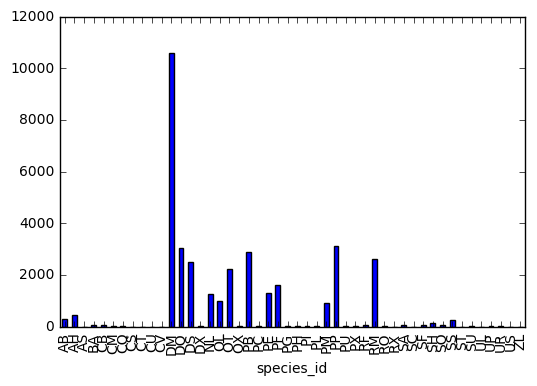

In [20]:
species_count.plot(kind='bar')

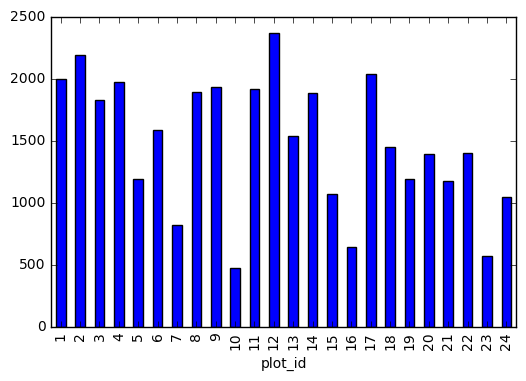

In [25]:
total_count = surveys_df['record_id'].groupby(surveys_df['plot_id']).nunique()
total_count.plot(kind='bar')

In [23]:
weight_count = surveys_df['record_id'].groupby(surveys_df['weight']).mean()

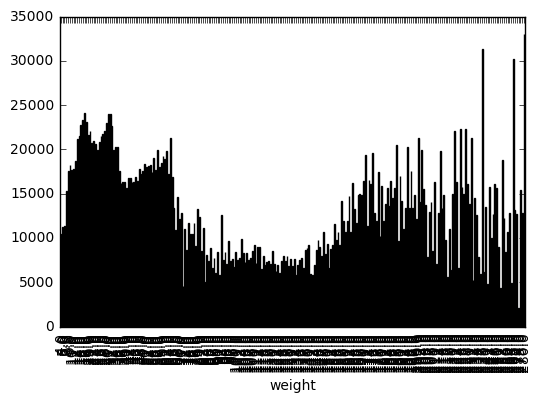

In [24]:
weight_count.plot(kind='bar')

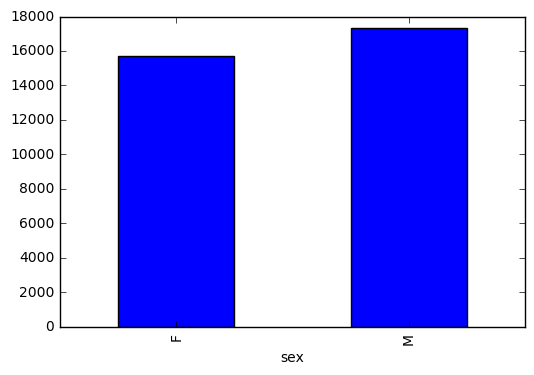

In [28]:
sex_count = surveys_df['record_id'].groupby(surveys_df['sex']).nunique()
sex_count.plot(kind='bar')

# Summary Plotting Challenge

Create a stacked bar plot, with weight on the Y axis, and the stacked variable
being sex. The plot should show total weight by sex for each plot. Some
tips are below to help you solve this challenge:

* [For more on Pandas plots, visit this link.](http://pandas.pydata.org/pandas-docs/dev/generated/pandas.core.groupby.DataFrameGroupBy.plot.html)
* You can use the code that follows to create a stacked bar plot but the data to stack
  need to be in individual columns.  Here's a simple example with some data where
  'a', 'b', and 'c' are the groups, and 'one' and 'two' are the subgroups.

```
d = {'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']),'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
pd.DataFrame(d)
```

shows the following data

```
       one  two
   a    1    1
   b    2    2
   c    3    3
   d  NaN    4
```

We can plot the above with

```
# plot stacked data so columns 'one' and 'two' are stacked
my_df = pd.DataFrame(d)
my_df.plot(kind='bar',stacked=True,title="The title of my graph")
```

![Stacked Bar Plot](../img/stackedBar1.png)

* You can use the `.unstack()` method to transform grouped data into columns
for each plotting.  Try running `.unstack()` on some DataFrames above and see
what it yields.

Start by transforming the grouped data (by plot and sex) into an unstacked layout, then create
a stacked plot.


## Solution to Summary Challenge

First we group data by plot and by sex, and then calculate a total for each plot.

```python
by_plot_sex = surveys_df.groupby(['plot_id','sex'])
plot_sex_count = by_plot_sex['weight'].sum()
```

This calculates the sums of weights for each sex within each plot as a table

```
plot  sex
plot_id  sex
1        F      38253
         M      59979
2        F      50144
         M      57250
3        F      27251
         M      28253
4        F      39796
         M      49377
<other plots removed for brevity>
```

Below we'll use `.unstack()` on our grouped data to figure out the total weight that each sex contributed to each plot.

```python
by_plot_sex = surveys_df.groupby(['plot_id','sex'])
plot_sex_count = by_plot_sex['weight'].sum()
plot_sex_count.unstack()
```

The `unstack` function above will display the following output:

```
sex          F      M
plot_id              
1        38253  59979
2        50144  57250
3        27251  28253
4        39796  49377
<other plots removed for brevity>
```

Now, create a stacked bar plot with that data where the weights for each sex are stacked by plot.

Rather than display it as a table, we can plot the above data by stacking the values of each sex as follows:

```python
by_plot_sex = surveys_df.groupby(['plot_id','sex'])
plot_sex_count = by_plot_sex['weight'].sum()
spc = plot_sex_count.unstack()
s_plot = spc.plot(kind='bar',stacked=True,title="Total weight by plot and sex")
s_plot.set_ylabel("Weight")
s_plot.set_xlabel("Plot")
```

![Stacked Bar Plot](../img/stackedBar.png)

In [9]:
by_plot_sex = surveys_df.groupby(['plot_id','sex'])
plot_sex_count = by_plot_sex['weight'].sum()
plot_sex_count.unstack()

sex,F,M
plot_id,,
1,38253.0,59979.0
2,50144.0,57250.0
3,27251.0,28253.0
4,39796.0,49377.0
5,21143.0,23326.0
6,26210.0,27245.0
7,6522.0,6422.0
8,37274.0,47755.0
9,44128.0,48727.0


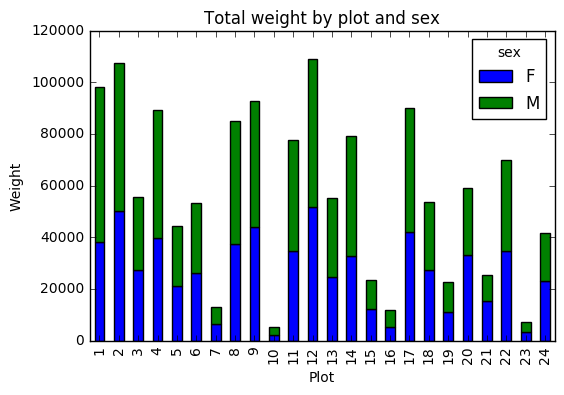

In [11]:
spc = plot_sex_count.unstack()
s_plot = spc.plot(kind='bar',stacked=True,title="Total weight by plot and sex")
s_plot.set_ylabel("Weight")
s_plot.set_xlabel("Plot")

In [109]:
# Solutions
# surveys_df.groupby('plot_id').describe().weight
# surveys_df.dropna().groupby('plot_id').describe().weight


# species_counts = surveys_df.groupby('species_id').count()['record_id']